# Project 4

## Installations

In [1]:
# if not already present remove the "#" below this line in order to instl obspy.
#!pip install --upgrade seaborn==0.9.0

#!pip install obspy

## imports

In [2]:
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime
from scipy.fftpack import fft

# Part 1) Wind and Rain Noise

## Plot PSD

In [3]:
def plotPSD(st, plotTitle):
    
    fs = st[0].stats.sampling_rate
    t_start = st[0].stats.starttime 
    t_end = st[0].stats.starttime + 50
    sliced = st.slice(t_start, t_end)
    
    x = (sliced[0].data)*np.hanning(len(sliced[0].data))
    xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
    fre = np.linspace(1,fs,64000)
    data_db = 10*np.log10(np.abs(xfft))+169-128.9
    plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [dB**2/Hz]')
    plt.title('PSD vs Frequency for ' + plotTitle)
    plt.xlim(0,15000) 
    plt.show()
    

In [4]:
# list of links to use from project 2 for Oregon SHELF 

# Calm:
# https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/07/25/OO-HYEA2--YDH-2019-07-25T01:22:22.388688.mseed

# Rainy:
# https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/05/06/OO-HYEA2--YDH-2019-05-06T02:50:00.000000.mseed

# Windy:
# https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/07/14/OO-HYEA2--YDH-2019-07-14T05:07:00.589250.mseed

# Stormy:
# https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/03/01/OO-HYEA2--YDH-2019-03-01T00:00:00.000000.mseed


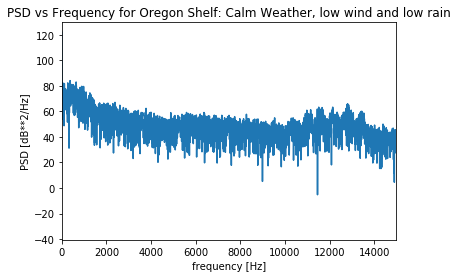

In [5]:
st = read('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/07/25/OO-HYEA2--YDH-2019-07-25T01:22:22.388688.mseed')
plotPSD(st, 'Oregon Shelf: Calm Weather, low wind and low rain')

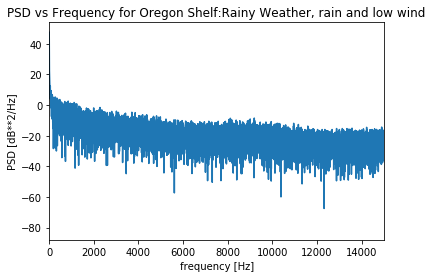

In [6]:
st = read('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/05/06/OO-HYEA2--YDH-2019-05-06T02:50:00.000000.mseed')
plotPSD(st, 'Oregon Shelf:Rainy Weather, rain and low wind')


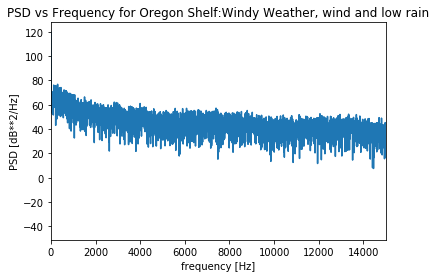

In [7]:
st = read('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/07/14/OO-HYEA2--YDH-2019-07-14T05:07:00.589250.mseed')
plotPSD(st, 'Oregon Shelf:Windy Weather, wind and low rain')


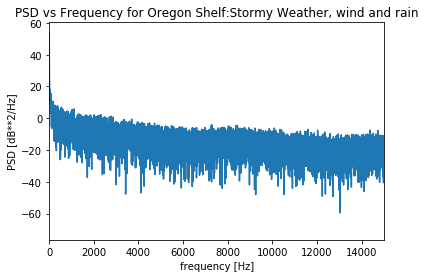

In [8]:
st = read('https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/03/01/OO-HYEA2--YDH-2019-03-01T00:00:00.000000.mseed')
plotPSD(st, 'Oregon Shelf:Stormy Weather, wind and rain')

In [9]:
# list of links to use from project 2 for Oregon OFFSHORE 

# Calm:
# https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/03/10/OO-HYEA1--YDH-2019-03-10T00:00:00.000015.mseed

# Rainy:
# https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/26/OO-HYEA1--YDH-2019-02-26T19:00:00.000000.mseed

# Windy:
# https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/03/07/OO-HYEA1--YDH-2019-03-07T07:00:00.000015.mseed

# Stormy:
# https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/02/OO-HYEA1--YDH-2019-01-02T23:00:00.000015.mseed



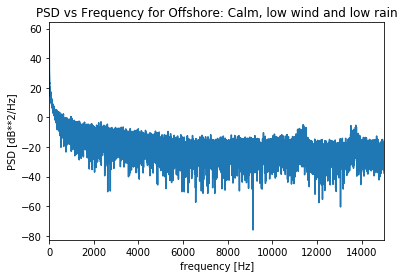

In [10]:
st = read('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/03/10/OO-HYEA1--YDH-2019-03-10T00:00:00.000015.mseed')
plotPSD(st, 'Offshore: Calm, low wind and low rain')


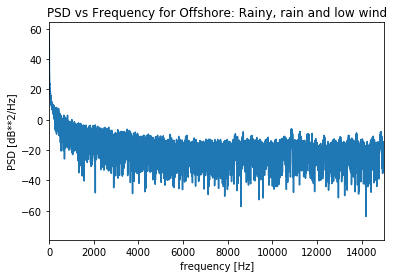

In [11]:
st = read('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/26/OO-HYEA1--YDH-2019-02-26T19:00:00.000000.mseed')
plotPSD(st, 'Offshore: Rainy, rain and low wind')

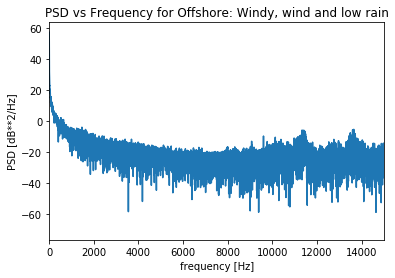

In [12]:
st = read('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/03/07/OO-HYEA1--YDH-2019-03-07T07:00:00.000015.mseed')
plotPSD(st, 'Offshore: Windy, wind and low rain')


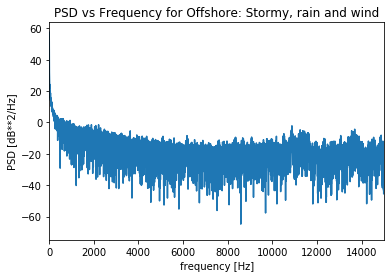

In [13]:
st = read('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/02/OO-HYEA1--YDH-2019-01-02T23:00:00.000015.mseed')
plotPSD(st, 'Offshore: Stormy, rain and wind')


# PART 2) Airgun, Marine Mammals, Earthquake/VolcanoNoise

## Plot Spectogram 

In [14]:
def plotSpec(st, start, end, HzLim, title):
    # start and end needed because spectagram is a shor amount of time, takes too long if too big
    # different sources have different relevent Hz ranges, purpose of HzLim 
    
    fs = st[0].stats.sampling_rate
    t_start = st[0].stats.starttime + start
    t_end = st[0].stats.starttime + start + end
    sliced = st.slice(t_start, t_end)

    npts = len(sliced[0])
    end = npts / fs
    nfft = int(fs/16)  
    per_lap = 0.90      
    nlap = int(nfft * float(per_lap))   

    specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
    specgram = 10 * np.log10(specgram) +169-128.9
    plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
    plt.xlabel('time (s)')
    plt.ylabel('freq (Hz)')
    plt.title(title + 'Spectogram')
    plt.colorbar()
    plt.ylim(0, HzLim)

## Marine Mammal Vocalization
Given datum, Oregon Slope Base Seafloor, 06/October/2017

In [15]:
stMM = read('https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:00:00.000015.mseed')


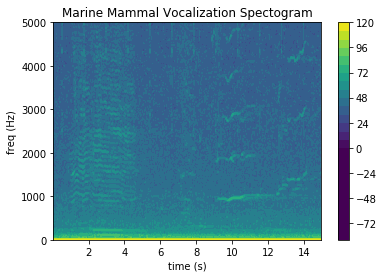

In [16]:
plotSpec(stMM, 0,15,5000, 'Marine Mammal Vocalization ')

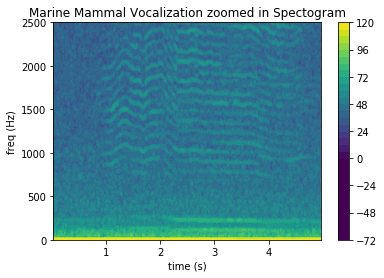

In [35]:
plotSpec(stMM, 0,5,2500, 'Marine Mammal Vocalization zoomed in ')

## Airgun Noise 
Given datym, Axial Base Seafloor, 1/August/2019

In [18]:
stAG = read('https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T10:00:00.000015.mseed')


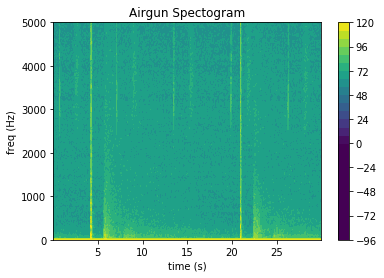

In [19]:
plotSpec(stAG, 0, 30, 5000, 'Airgun ')

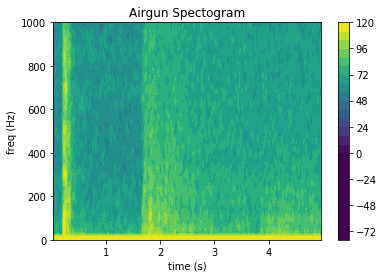

In [40]:
plotSpec(stAG, 4, 5, 1000, 'Airgun ')

## Earthquake or volcano eruption 
Data based of 6.2 earthquake off the coast of Oregon, 2018-08-22

In [21]:
stEQ = read('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/08/22/OO-HYEA1--YDH-2018-08-22T09:30:00.003563.mseed')


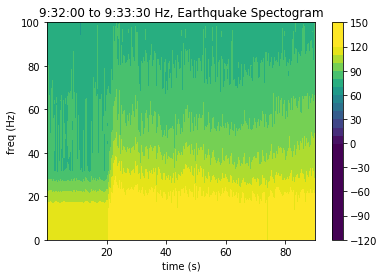

In [31]:
plotSpec(stEQ, 120, 90, 100, '9:32:00 to 9:33:30 Hz, Earthquake ')
